**Installing all libraries and connecting to dataset via google drive**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from glob import glob
from IPython.display import Audio, display
from google.colab import drive
import pickle
import math
import statistics
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
files=glob('/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/*.wav')
print(files)
print(type(files))
print("No. of audio files in taken dataset is",len(files))

['/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/104_1b1_Ll_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/103_2b2_Ar_mc_LittC2SE.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/104_1b1_Pr_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/101_1b1_Al_sc_Meditron.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/104_1b1_Al_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/104_1b1_Ar_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/104_1b1_Lr_sc_Litt3200.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/105_1b1_Tc_sc_Meditron.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/106_2b1_Pr_mc_LittC2SE.wav', '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/107_2b3_

**Spetrogram of Unhealthy person**

In [3]:
audio, sf =lr.load(files[0])
print(sf)
print(type(audio))

22050
<class 'numpy.ndarray'>


In [4]:
audio

array([ 2.8716400e-05,  3.0564144e-05,  2.5685877e-05, ...,
       -1.8278951e-02, -1.1690978e-02, -5.6330040e-03], dtype=float32)

In [5]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(files[0])
print(wave_sample_rate)

4000


In [6]:
wave_audio

array([    1,    -2,   -11, ..., -1069, -1079, -1090], dtype=int16)

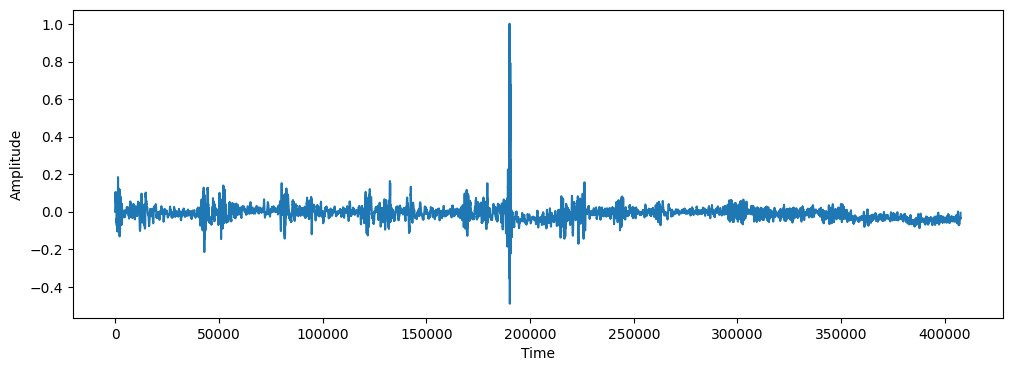

In [12]:
plt.figure(figsize=(12,4))
plt.plot(audio)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

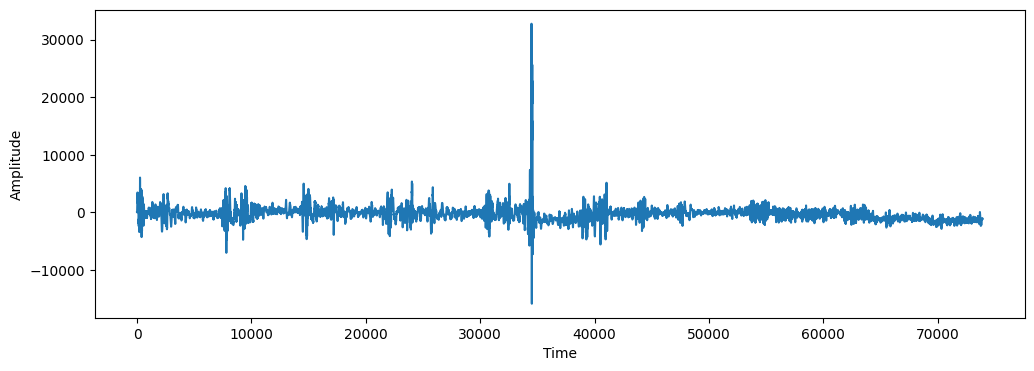

In [13]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

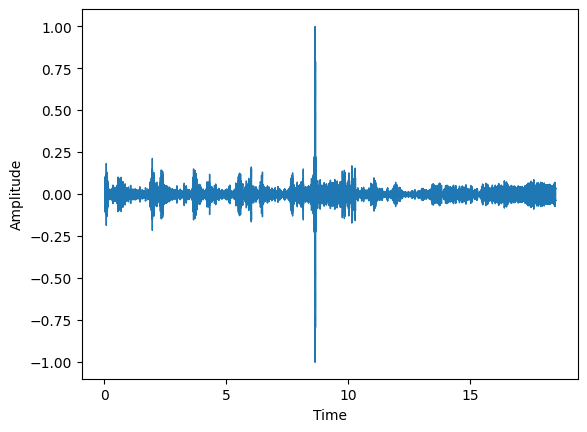

<Figure size 400x400 with 0 Axes>

In [14]:
librosa.display.waveshow(audio, sr=sf)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.figure(figsize=(4, 4))
plt.show()

In [15]:
fft = np.fft.fft(audio)
print(fft)
print(len(fft))

[-3588.86303953   +0.j         -1066.86165268-1191.72881288j
 -2193.84306996-1499.52502446j ...   206.48508367+1247.14549651j
 -2193.84306996+1499.52502446j -1066.86165268+1191.72881288j]
407484


In [16]:
spectrum = np.abs(fft)
spectrum

array([3588.86303953, 1599.50346965, 2657.35257626, ..., 1264.12340348,
       2657.35257626, 1599.50346965])

In [17]:
f = np.linspace(0, sf, len(spectrum))

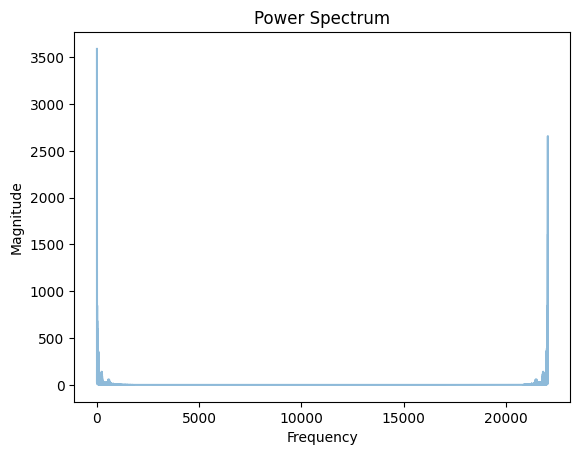

<Figure size 300x500 with 0 Axes>

In [18]:
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")
plt.figure(figsize=(3, 5))
plt.show()

In [19]:
display(Audio(files[0],autoplay=True))

In [ ]:
# display(Audio('/content/101_1b1_Al_sc_Meditron.wav',autoplay=False))

In [20]:
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [21]:
# Perform STFT
stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)

In [22]:
spectrogram = np.abs(stft)

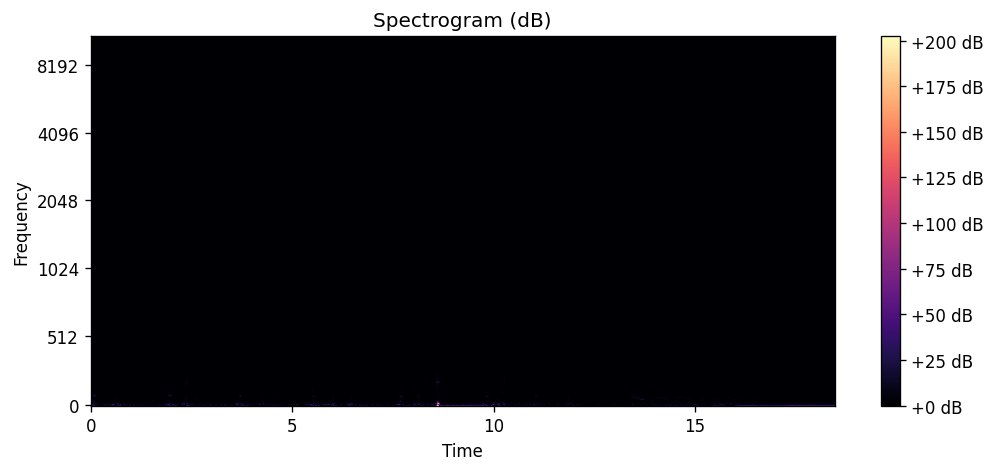

Spectrogram of an Unhealthy person


In [23]:
fig, ax = plt.subplots(figsize=(10,4), dpi=120)
librosa.display.specshow(spectrogram, sr=sf,x_axis='time', y_axis='mel', hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()
print('Spectrogram of an Unhealthy person')

In [24]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

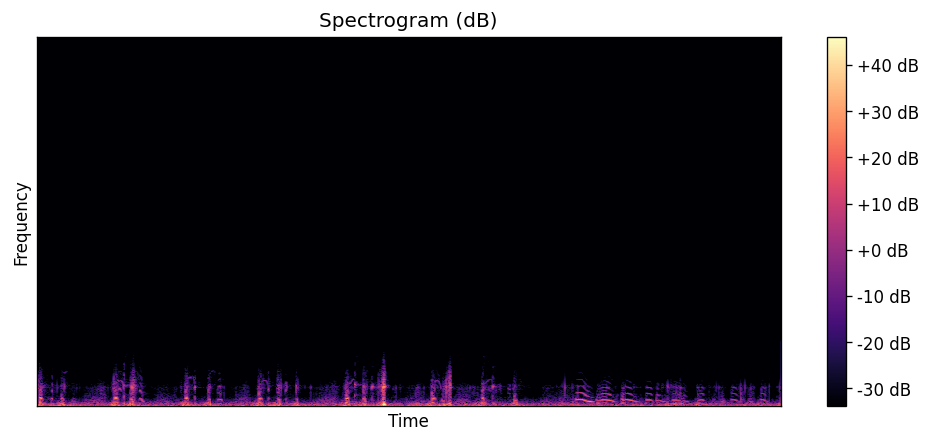

Log-Spectrogram of an Unhealthy person


In [25]:
# Plot the Spectrogram in Decibels
fig, ax = plt.subplots(figsize=(10,4), dpi=120)
librosa.display.specshow(log_spectrogram, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()
print('Log-Spectrogram of an Unhealthy person')

In [26]:
# MFCCs (we use 13 MFCCs)

MFCCs = lr.feature.mfcc(y=audio, sr = sf, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
MFCCs.shape
# MFCCs = librosa.feature.mfcc(audio, y=None, sr=22050, S=None, n_mfcc=13, dct_type=2, norm='ortho', lifter=0, **kwargs)

(13, 796)

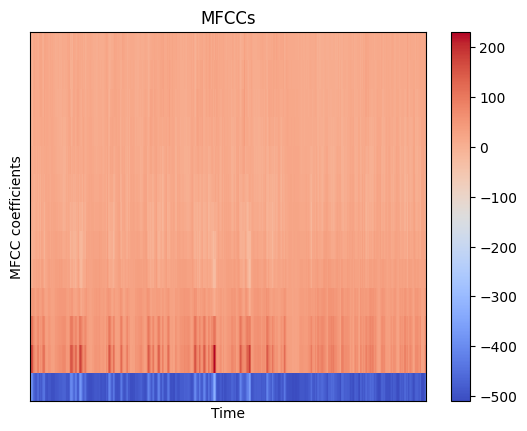

In [27]:
# Plot MFCCs
librosa.display.specshow(MFCCs, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

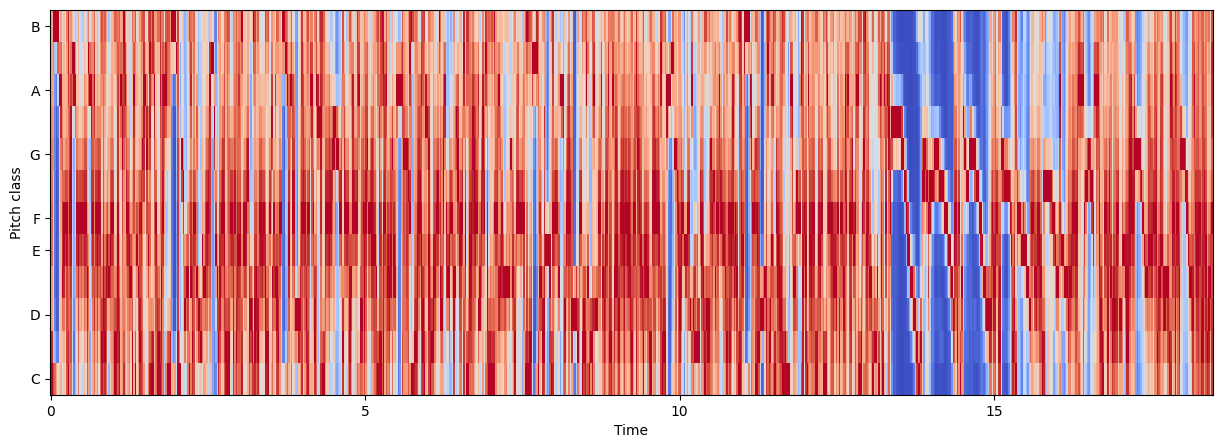

In [28]:
chromagram = librosa.feature.chroma_stft(y=audio, sr=sf, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()

**Spectrogram of healthy person**

In [29]:
display(Audio(files[40],autoplay=True))

In [30]:
audio_healthy, sf =lr.load(files[40])
print(sf)
print(type(audio_healthy))
print(len(audio_healthy))

22050
<class 'numpy.ndarray'>
441000


In [31]:
fft = np.fft.fft(audio_healthy)
print(fft)
print(len(fft))

[-10.5526264 +0.j          -0.77568442+3.46299017j
   1.70269337+2.90518551j ...   2.74594362-2.02950688j
   1.70269337-2.90518551j  -0.77568442-3.46299017j]
441000


In [32]:
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window
# Perform STFT
stft = librosa.stft(audio_healthy, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

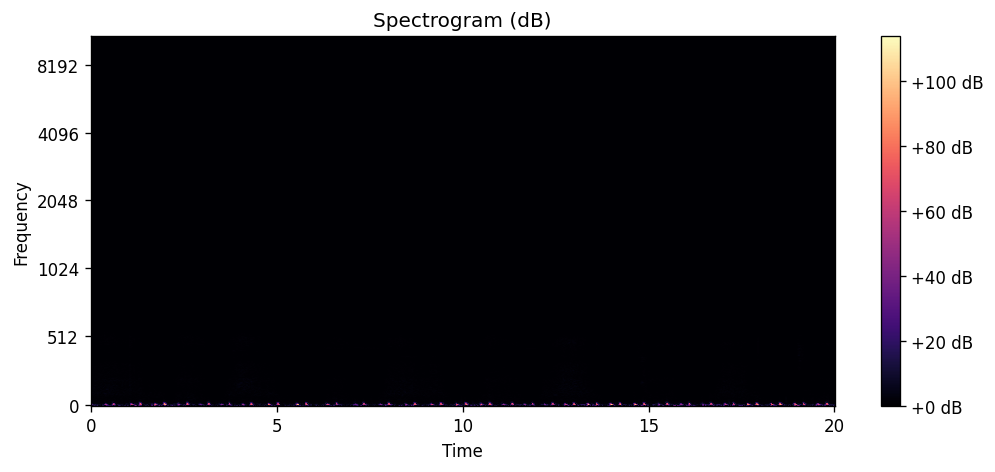

Spectrogram of an healthy person


In [33]:
# Plot the Spectrogram
fig, ax = plt.subplots(figsize=(10,4), dpi=120)
librosa.display.specshow(spectrogram, sr=sf,x_axis='time', y_axis='mel', hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()
print('Spectrogram of an healthy person')

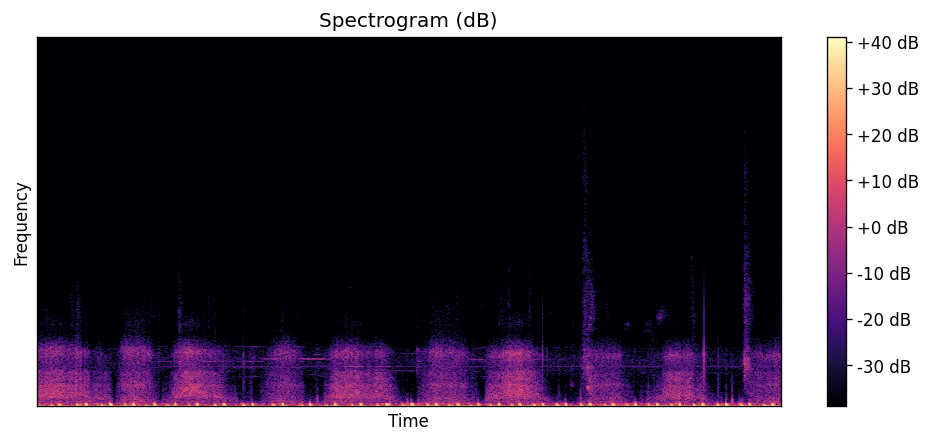

Log-Spectrogram of an healthy person


In [34]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
# Plot the Spectrogram in Decibels
fig, ax = plt.subplots(figsize=(10,4), dpi=120)
librosa.display.specshow(log_spectrogram, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()
print('Log-Spectrogram of an healthy person')

In [35]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=audio_healthy, sr=sf, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

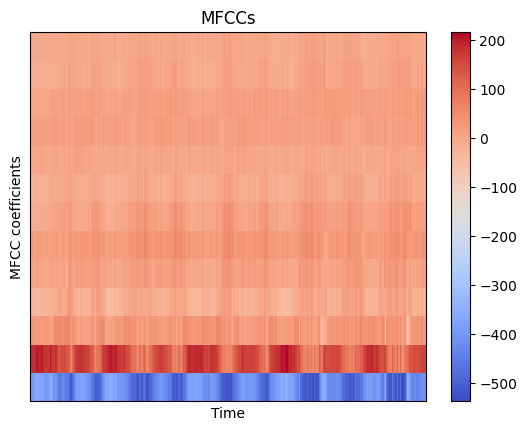

In [36]:
# Plot MFCCs
librosa.display.specshow(MFCCs, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

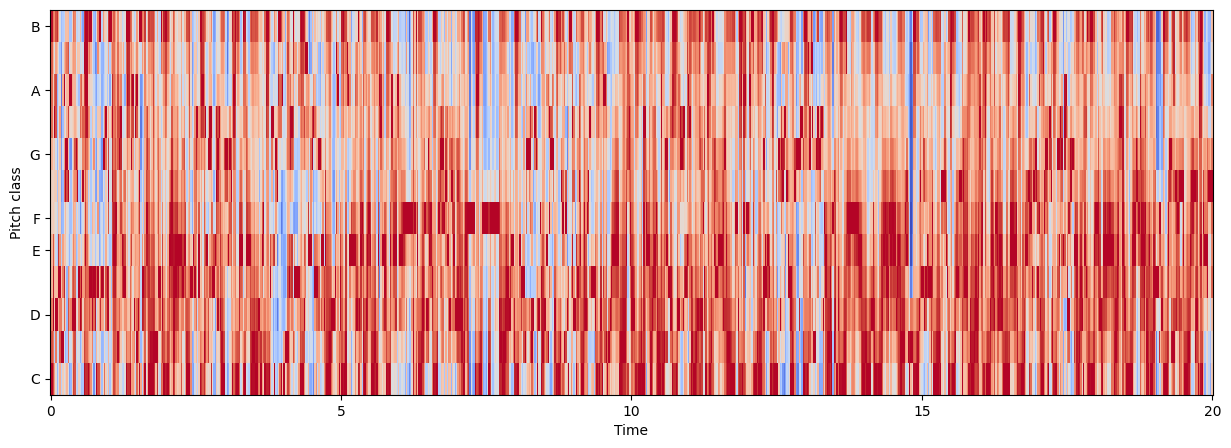

In [37]:
chromagram = librosa.feature.chroma_stft(y=audio_healthy, sr=sf, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()

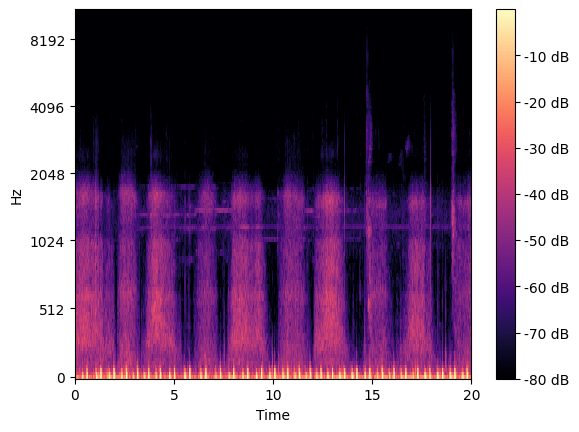

In [38]:
n_mels = 128
mel = librosa.filters.mel(sr=sf, n_fft=n_fft, n_mels=n_mels)

S = librosa.feature.melspectrogram(y=audio_healthy, sr=sf, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sf, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

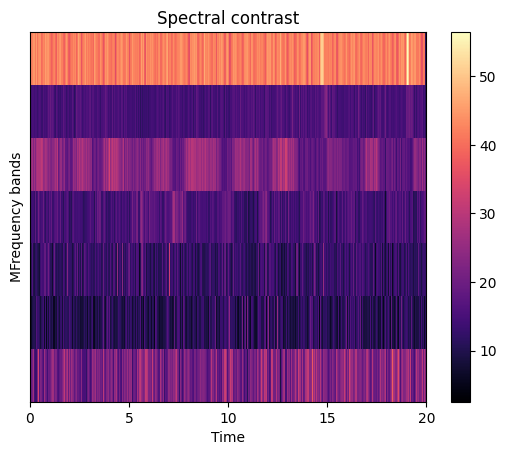

In [39]:
S = np.abs(librosa.stft(audio_healthy))
contrast = librosa.feature.spectral_contrast(S=S, sr=sf)

librosa.display.specshow(contrast, x_axis='time')
plt.xlabel("Time")
plt.ylabel("MFrequency bands")
plt.colorbar()
plt.title("Spectral contrast")
plt.show()

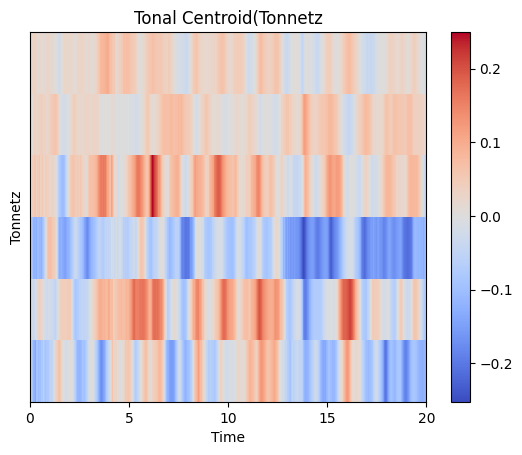

In [40]:
y = librosa.effects.harmonic(audio_healthy)
tonnetz = librosa.feature.tonnetz(y=y, sr=sf)
librosa.display.specshow(tonnetz, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Tonnetz")
plt.colorbar()
plt.title("Tonal Centroid(Tonnetz")
plt.show()

In [41]:
audio_copd, sf =lr.load(files[0])
audio_healthy, sf =lr.load(files[40])
audio_asthma, sf =lr.load(files[1])
audio_urti, sf =lr.load(files[51])
audio_lrti, sf =lr.load(files[26])
audio_pneumonia, sf =lr.load(files[55])
audio_chie, sf =lr.load(files[52])
audio_choi, sf =lr.load(files[224])

stft_copd = librosa.stft(audio_copd, n_fft=n_fft, hop_length=hop_length)
stft_healthy = librosa.stft(audio_healthy, n_fft=n_fft, hop_length=hop_length)
stft_asthma = librosa.stft(audio_asthma, n_fft=n_fft, hop_length=hop_length)
stft_urti = librosa.stft(audio_urti, n_fft=n_fft, hop_length=hop_length)
stft_lrti = librosa.stft(audio_lrti, n_fft=n_fft, hop_length=hop_length)
stft_pneumonia = librosa.stft(audio_pneumonia, n_fft=n_fft, hop_length=hop_length)
stft_chie = librosa.stft(audio_chie, n_fft=n_fft, hop_length=hop_length)
stft_choi = librosa.stft(audio_choi, n_fft=n_fft, hop_length=hop_length)

spectrogram_copd = np.abs(stft_copd)
log_spectrogram_copd = librosa.amplitude_to_db(spectrogram_copd)

spectrogram_healthy = np.abs(stft_healthy)
log_spectrogram_healthy = librosa.amplitude_to_db(spectrogram_healthy)

spectrogram_asthma = np.abs(stft_asthma)
log_spectrogram_asthma = librosa.amplitude_to_db(spectrogram_asthma)

spectrogram_urti = np.abs(stft_urti)
log_spectrogram_urti = librosa.amplitude_to_db(spectrogram_urti)

spectrogram_lrti = np.abs(stft_lrti)
log_spectrogram_lrti = librosa.amplitude_to_db(spectrogram_lrti)

spectrogram_pneumonia = np.abs(stft_pneumonia)
log_spectrogram_pneumonia = librosa.amplitude_to_db(spectrogram_pneumonia)

spectrogram_chie = np.abs(stft_chie)
log_spectrogram_chie = librosa.amplitude_to_db(spectrogram_chie)

spectrogram_choi = np.abs(stft_choi)
log_spectrogram_choi = librosa.amplitude_to_db(spectrogram_choi)

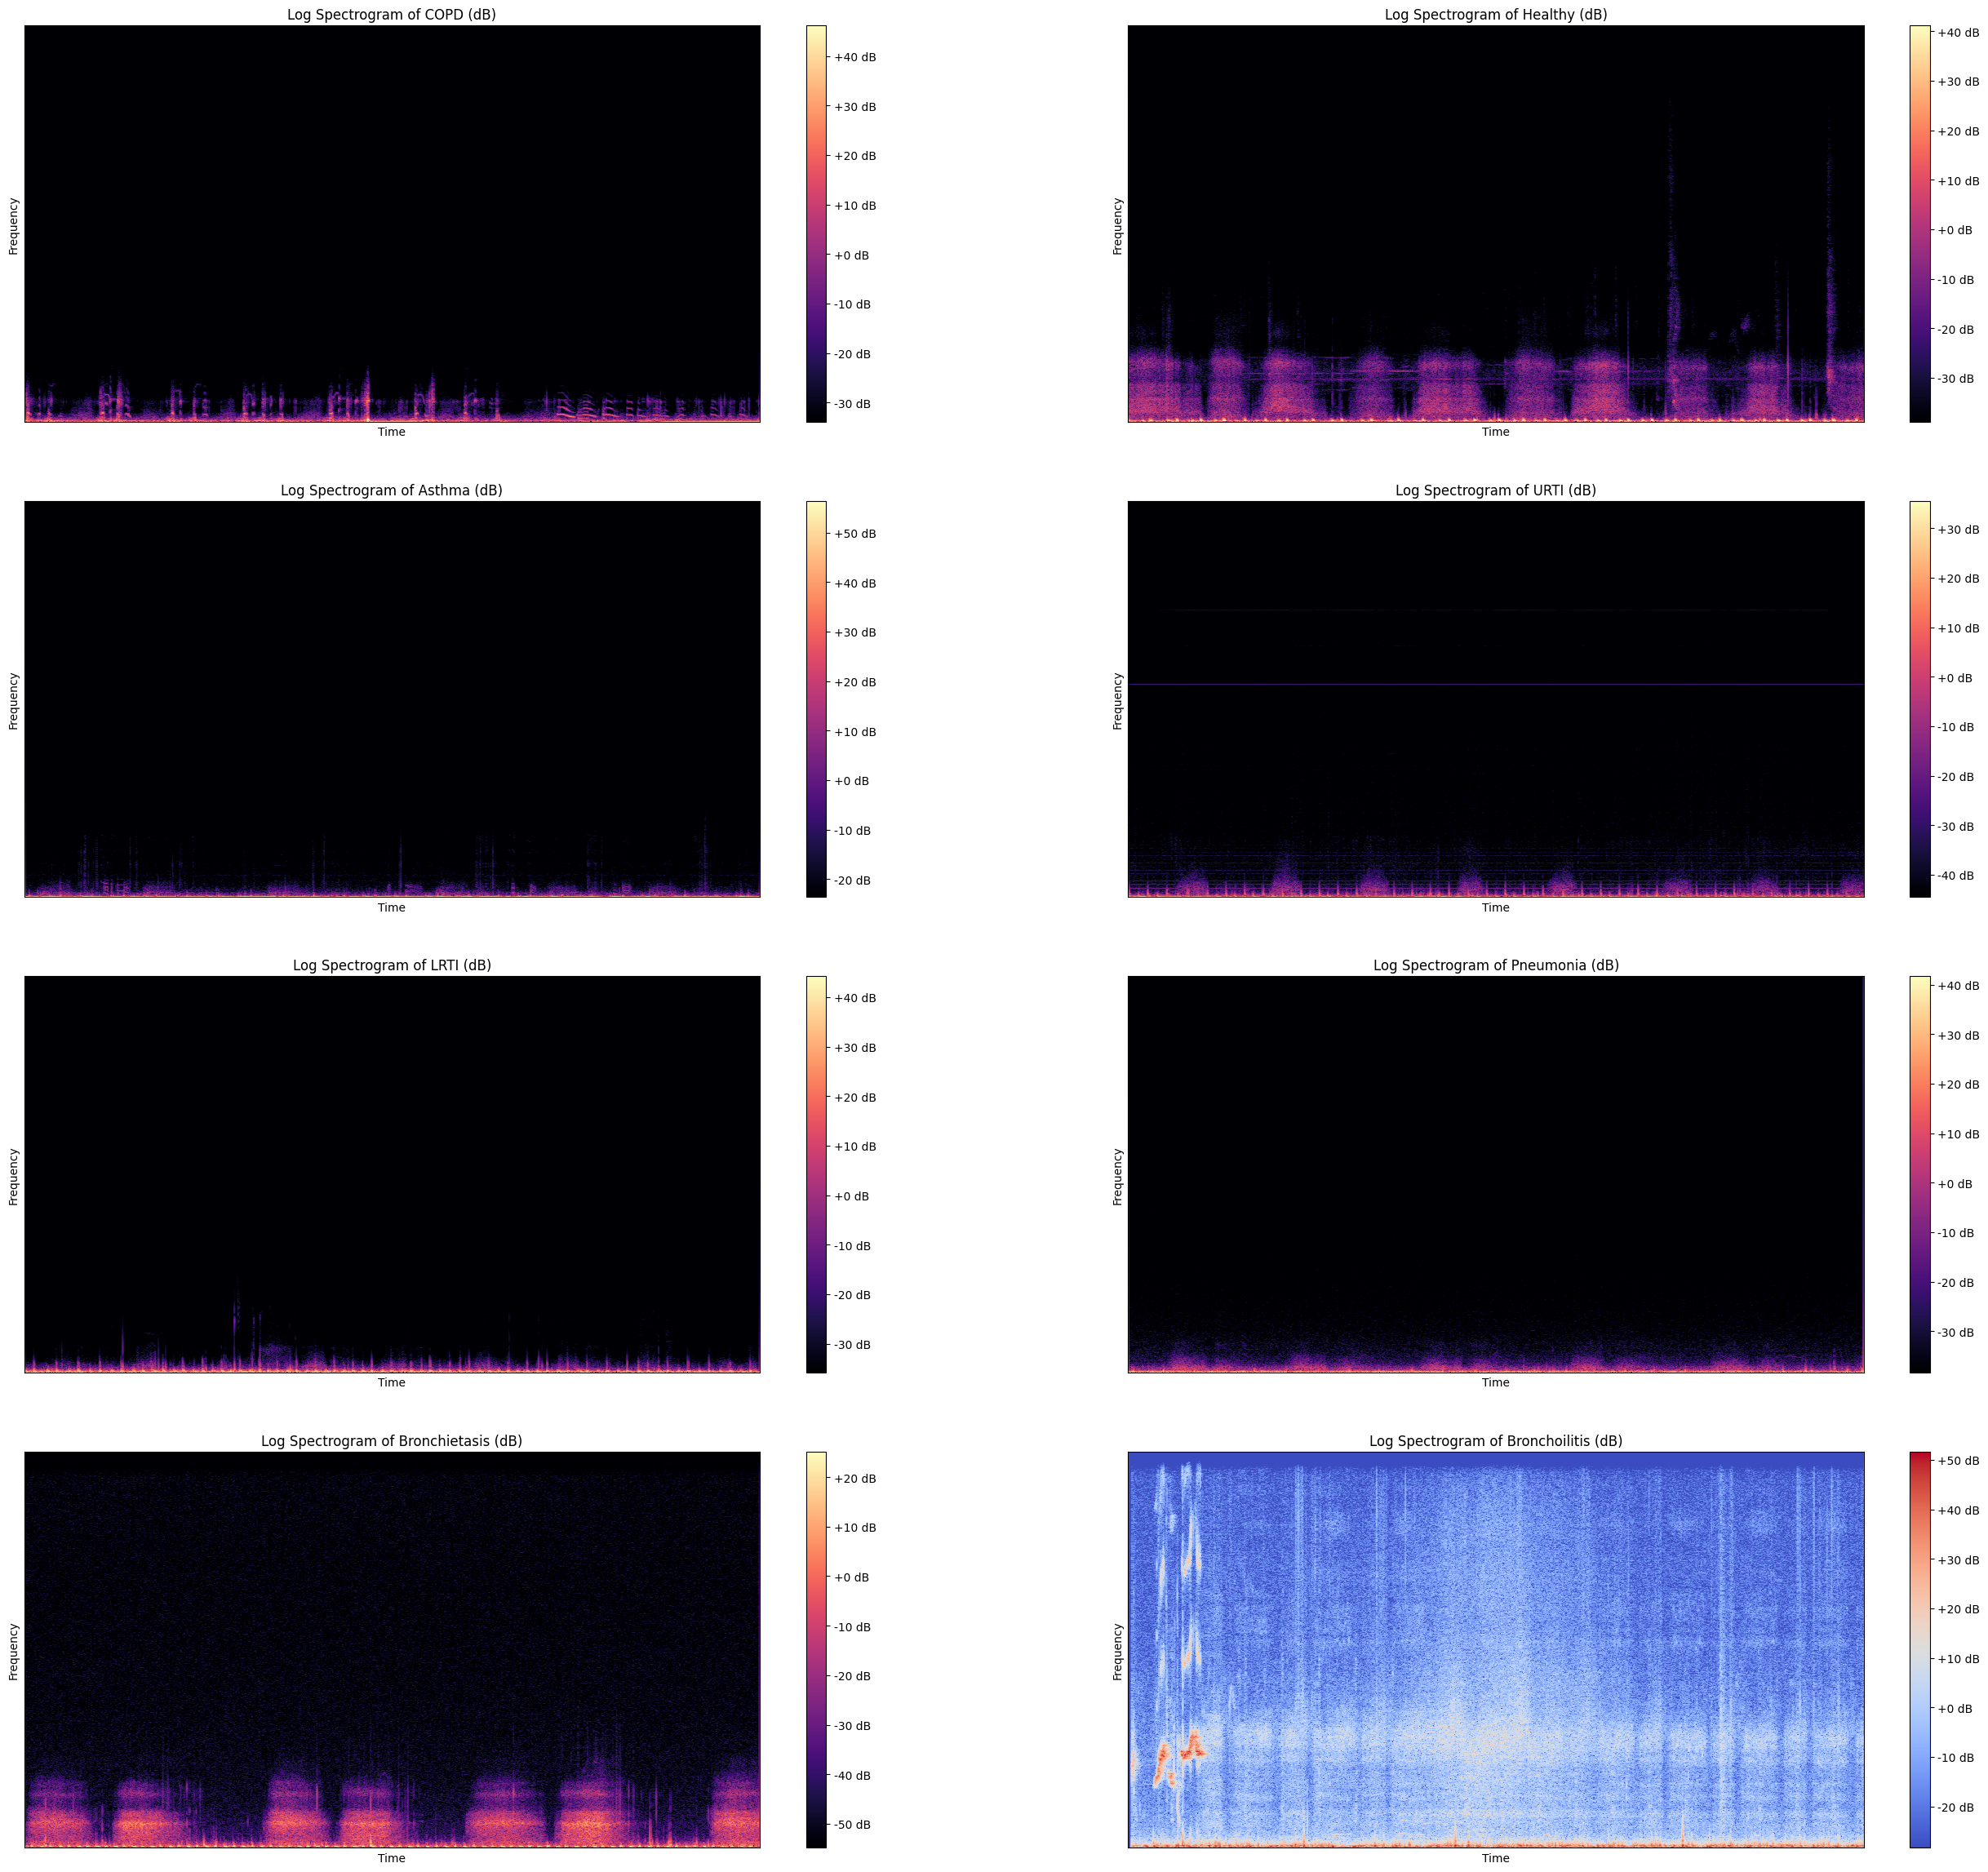

In [42]:
# Plot log_spectrum of respiratory diseases
plt.figure(figsize = (32,29))
plt.subplot(4,2,1)
librosa.display.specshow(log_spectrogram_copd, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of COPD (dB)")

plt.subplot(4,2,2)
librosa.display.specshow(log_spectrogram_healthy, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of Healthy (dB)")

plt.subplot(4,2,3)
librosa.display.specshow(log_spectrogram_asthma, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of Asthma (dB)")

plt.subplot(4,2,4)
librosa.display.specshow(log_spectrogram_urti, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of URTI (dB)")

plt.subplot(4,2,5)
librosa.display.specshow(log_spectrogram_lrti, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of LRTI (dB)")

plt.subplot(4,2,6)
librosa.display.specshow(log_spectrogram_pneumonia, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of Pneumonia (dB)")

plt.subplot(4,2,7)
librosa.display.specshow(log_spectrogram_chie, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of Bronchietasis (dB)")

plt.subplot(4,2,8)
librosa.display.specshow(log_spectrogram_choi, sr=sf, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram of Bronchoilitis (dB)")
plt.show()

In [43]:
from os import listdir
from os.path import isfile, join
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Activation, MaxPooling1D, Dropout
from tensorflow.keras.utils import plot_model,to_categorical
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

In [46]:
diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/First_approach_dataset/patient_diagnosis_1.csv')
diagnosis.head(10)

Unnamed: 0  patient_Id Disease                    FileName
0           0         160    COPD  160_1b3_Lr_mc_AKGC417L.wav
1           1         160    COPD  160_1b2_Tc_mc_AKGC417L.wav
2           2         160    COPD  160_1b3_Pl_mc_AKGC417L.wav
3           3         160    COPD  160_1b3_Tc_mc_AKGC417L.wav
4           4         160    COPD  160_1b4_Lr_mc_AKGC417L.wav
5           5         160    COPD  160_1b4_Ar_mc_AKGC417L.wav
6           6         160    COPD  160_1b4_Al_mc_AKGC417L.wav
7           7         160    COPD  160_1b3_Pr_mc_AKGC417L.wav
8           8         160    COPD  160_1b4_Pr_mc_AKGC417L.wav
9           9         160    COPD  160_1b4_Tc_mc_AKGC417L.wav

In [47]:
diagnosis['Disease'].value_counts()

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
LRTI                2
Asthma              1
Name: Disease, dtype: int64

In [60]:
class Diagnosis():
  def __init__ (self, id, diagnosis, image_path):
    self.id = id
    self.diagnosis = diagnosis
    self.image_path = image_path

In [61]:
def get_wav_files():
  audio_path = '/content/gdrive/MyDrive/Major_Project/First_approach_dataset/wave_files/'
  files = [f for f in listdir(audio_path) if isfile(join(audio_path, f))]  #Gets all files in dir
  wav_files = [f for f in files if f.endswith('.wav')]  # Gets wav files
  wav_files = sorted(wav_files)
  return wav_files, audio_path

In [62]:
def diagnosis_data():
  diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/First_approach_dataset/patient_diagnosis.csv')

  wav_files, audio_path = get_wav_files()
  diag_dict = { 101 : "URTI"}
  diagnosis_list = []

  for index , row in diagnosis.iterrows():
    diag_dict[row[0]] = row[1]

  c = 0
  for f in wav_files:
    diagnosis_list.append(Diagnosis(c, diag_dict[int(f[:3])], audio_path+f))
    c+=1

  return diagnosis_list

In [76]:
def audio_features(filename):
  sound, sample_rate = librosa.load(filename)
  stft = np.abs(librosa.stft(sound))

  mfccs = np.mean(librosa.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40),axis=1)
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate),axis=1)
  mel = np.mean(librosa.feature.melspectrogram(y=sound, sr=sample_rate),axis=1)
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate),axis=1)
  tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(sound), sr=sample_rate),axis=1)

  concat = np.concatenate((mfccs,chroma,mel,contrast,tonnetz))
  print(concat.size)
  return concat

def data_points():
  labels = []
  images = []

  to_hot_one = {"COPD":0, "Healthy":1, "URTI":2, "Bronchiectasis":3, "Pneumonia":4, "Bronchiolitis":5, "Asthma":6, "LRTI":7}

  count = 0
  for f in diagnosis_data():
    print(count)
    labels.append(to_hot_one[f.diagnosis])
    images.append(audio_features(f.image_path))
    count+=1

  return np.array(labels), np.array(images)

In [64]:
def preprocessing(labels, images):

  # Remove Asthma and LRTI
  images = np.delete(images, np.where((labels == 7) | (labels == 6))[0], axis=0)
  labels = np.delete(labels, np.where((labels == 7) | (labels == 6))[0], axis=0)

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

  # Hot one encode the labels
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  # Format new data
  y_train = np.reshape(y_train, (y_train.shape[0], 6))
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  y_test = np.reshape(y_test, (y_test.shape[0], 6))
  X_test = np.reshape(X_test, (X_test.shape[0], X_train.shape[1],  1))

  return X_train, X_test, y_train, y_test

In [77]:
start = timer()

labels, images = data_points()

print('Time taken: ', (timer() - start))

0


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


193
1
193
2
193
3
193
4
193
5
193
6
193
7
193
8
193
9
193
10
193
11
193
12
193
13
193
14
193
15
193
16
193
17
193
18
193
19
193
20
193
21
193
22
193
23
193
24
193
25
193
26
193
27
193
28
193
29
193
30
193
31
193
32
193
33
193
34
193
35
193
36
193
37
193
38
193
39
193
40
193
41
193
42
193
43
193
44
193
45
193
46
193
47
193
48
193
49
193
50
193
51
193
52
193
53
193
54
193
55
193
56
193
57
193
58
193
59
193
60
193
61
193
62
193
63
193
64
193
65
193
66
193
67
193
68
193
69
193
70
193
71
193
72
193
73
193
74
193
75
193
76
193
77
193
78
193
79
193
80
193
81
193
82
193
83
193
84
193
85
193
86
193
87
193
88
193
89
193
90
193
91
193
92
193
93
193
94
193
95
193
96
193
97
193
98
193
99
193
100
193
101
193
102
193
103
193
104
193
105
193
106
193
107
193
108
193
109
193
110
193
111
193
112
193
113
193
114
193
115
193
116
193
117
193
118
193
119
193
120
193
121
193
122
193
123
193
124
193
125
193
126
193
127
193
128
193
129
193
130
193
131
193
132
193
133
193
134
193
135
193
136
193
137
193
138
193


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


193
909
193
910
193
911
193
912
193
913
193
914
193
915
193
916
193
917
193
918
193
919
193
Time taken:  1941.178166915


In [78]:
import pickle
file_name = "images.pkl"

open_file = open(file_name, "wb")
pickle.dump(images, open_file)
open_file.close()

open_file = open(file_name, "rb")
images = pickle.load(open_file)
open_file.close()

print(images)
print(len(images[0]))
print(type(images))

[[-5.28425232e+02  1.04517365e+02  6.99075851e+01 ...  4.81926881e-03
   1.27141926e-02  4.89184958e-03]
 [-5.82504700e+02  9.53947067e+01  5.74021797e+01 ...  4.34437626e-02
   3.45577068e-02  1.15901413e-02]
 [-5.96806091e+02  1.16009735e+02  6.05925293e+01 ...  4.76627715e-02
   7.69976353e-03  6.11994561e-03]
 ...
 [-5.20420410e+02  1.02170097e+02  6.20514183e+01 ...  5.23547223e-02
   2.58310488e-02  2.49725045e-02]
 [-4.84382446e+02  8.53270035e+01  6.42665176e+01 ...  2.57526580e-02
   1.03959625e-02  1.61621982e-02]
 [-5.20002319e+02  8.56802826e+01  6.01338921e+01 ...  3.07433817e-02
   2.29466773e-02  1.94867369e-02]]
193
<class 'numpy.ndarray'>


In [79]:
print(images.shape)

(920, 193)


In [80]:
file_name = "labels.pkl"

open_file = open(file_name, "wb")
pickle.dump(labels, open_file)
open_file.close()

open_file = open(file_name, "rb")
labels = pickle.load(open_file)
open_file.close()

print(labels)
print(len(labels))
print(type(labels))
print(labels.shape)

[2 2 1 6 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 3 3
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 4 4 4 4 4 4 4 4 4 1 0 0 0 0 0 0 1 1 1 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 1 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 5 5 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0
 0 0 5 5 3 3 3 0 0 0 0 0 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# print(y_train.shape)
# print(y_test.shape)
# print(y_train.shape[0])

(736, 8)
(184, 6)
736


In [ ]:
# images = np.delete(images, np.where((labels == 7) | (labels == 6))[0], axis=0)
# print(images)
# print(images.shape)
# labels = np.delete(labels, np.where((labels == 7) | (labels == 6))[0], axis=0)
# print(labels)
# print(labels.shape)

[[-5.29149292e+02  1.04430153e+02  7.01555481e+01 ...  1.41299415e-02
   1.46743345e-02 -4.85950418e-03]
 [-5.83073425e+02  9.54062653e+01  5.76160927e+01 ...  4.89207335e-02
   3.55428707e-02  1.05146246e-02]
 [-5.96956177e+02  1.16085861e+02  6.06944885e+01 ...  4.69020374e-02
   7.50296904e-03  4.68625390e-03]
 ...
 [-5.20968262e+02  1.02006416e+02  6.21628380e+01 ...  5.79527157e-02
   2.34255605e-02  2.93149902e-02]
 [-4.85264801e+02  8.50668488e+01  6.44308319e+01 ...  2.69373058e-02
   8.62855234e-03  1.72657727e-02]
 [-5.20564697e+02  8.55388412e+01  6.03839302e+01 ...  3.11170021e-02
   2.26701781e-02  2.04534770e-02]]
(917, 193)
[2 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 1 1 4 4 4 4 4 4 4 4 4 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

  # Hot one encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)
print(y_train.shape[0])

(736, 8)
(184, 6)
736


In [82]:
X_train, X_test, y_train, y_test = preprocessing(labels, images)

In [83]:
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(193, 1)))

model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(256, kernel_size=5, activation='relu'))

model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=200, verbose=1)

Epoch 1/70
4/4 [==============================] - 15s 2s/step - loss: 6.9024 - accuracy: 0.6508 - val_loss: 2.5365 - val_accuracy: 0.8967
Epoch 2/70
4/4 [==============================] - 10s 2s/step - loss: 3.6710 - accuracy: 0.7585 - val_loss: 1.1450 - val_accuracy: 0.6630
Epoch 3/70
4/4 [==============================] - 8s 2s/step - loss: 1.7520 - accuracy: 0.5880 - val_loss: 0.8318 - val_accuracy: 0.8967
Epoch 4/70
4/4 [==============================] - 5s 1s/step - loss: 1.7026 - accuracy: 0.8568 - val_loss: 0.9200 - val_accuracy: 0.8967
Epoch 5/70
4/4 [==============================] - 4s 1s/step - loss: 1.6384 - accuracy: 0.8568 - val_loss: 0.7124 - val_accuracy: 0.8967
Epoch 6/70
4/4 [==============================] - 5s 1s/step - loss: 1.1706 - accuracy: 0.8568 - val_loss: 0.5587 - val_accuracy: 0.8967
Epoch 7/70
4/4 [==============================] - 5s 1s/step - loss: 0.8468 - accuracy: 0.8472 - val_loss: 0.4597 - val_accuracy: 0.8967
Epoch 8/70
4/4 [=======================

In [84]:
model.save("model_respiratory_disease_one_hot_encode.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
import tensorflow.keras as keras
reconstructed_model = keras.models.load_model("model_respiratory_disease_one_hot_encode.h5")

Accuracy: 95%
Loss: 0.1927



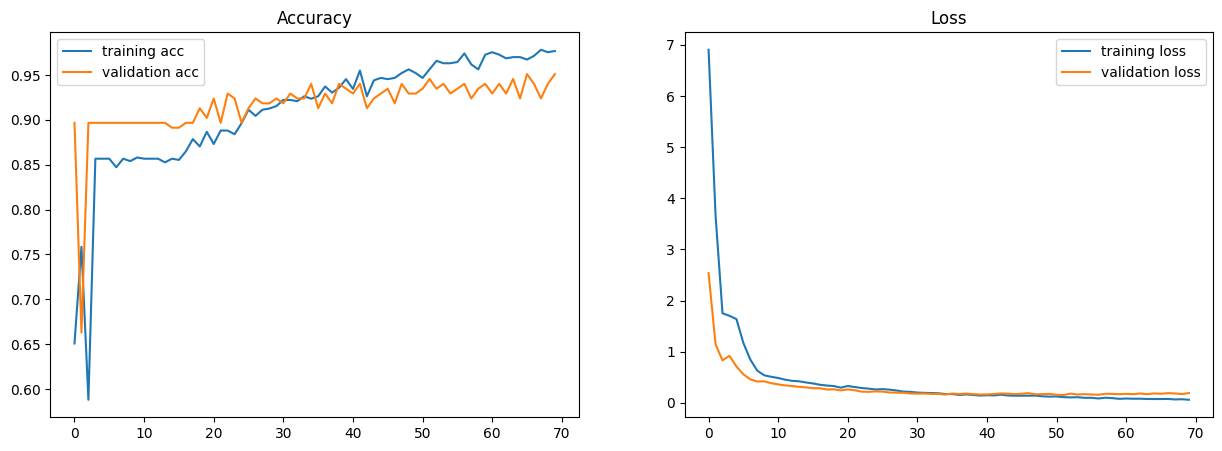

In [86]:
score = reconstructed_model.evaluate(X_test, y_test, batch_size=60, verbose=0)
print('Accuracy: {0:.0%}'.format(score[1]/1))
print("Loss: %.4f\n" % score[0])

# Plot accuracy and loss graphs
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'training acc')
plt.plot(history.history['val_accuracy'], label = 'validation acc')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

6/6 [==============================] - 0s 44ms/step
                precision    recall  f1-score   support

          COPD       0.99      0.99      0.99       165
       Healthy       0.62      0.71      0.67         7
          URTI       0.50      0.25      0.33         4
Bronchiectasis       1.00      0.75      0.86         4
     Pneumoina       0.50      1.00      0.67         3
 Bronchiolitis       0.00      0.00      0.00         1

      accuracy                           0.95       184
     macro avg       0.60      0.62      0.59       184
  weighted avg       0.95      0.95      0.95       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='Predicted', ylabel='Actual'>

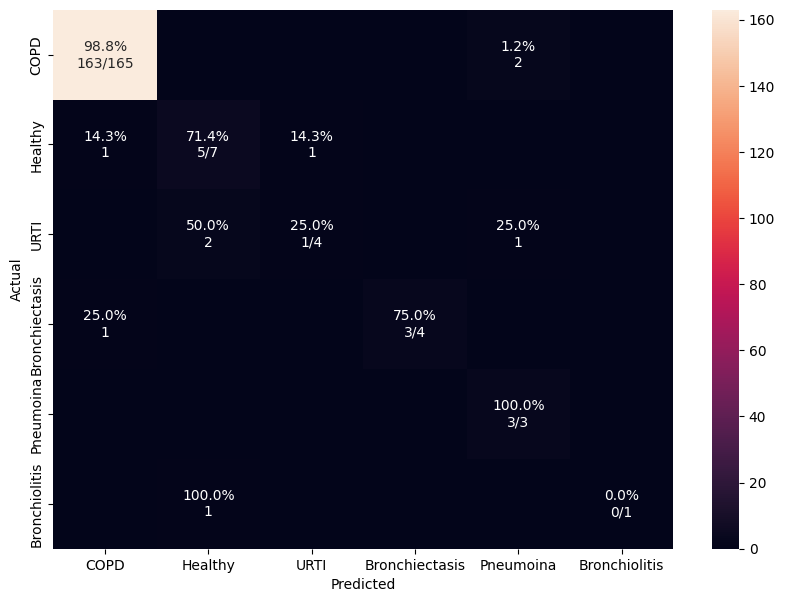

In [87]:
matrix_index = ["COPD", "Healthy", "URTI", "Bronchiectasis", "Pneumoina", "Bronchiolitis"]

preds = model.predict(X_test)
classpreds = np.argmax(preds, axis=1) # predicted classes
y_testclass = np.argmax(y_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sn.heatmap(df_cm, annot=annot, fmt='')